In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

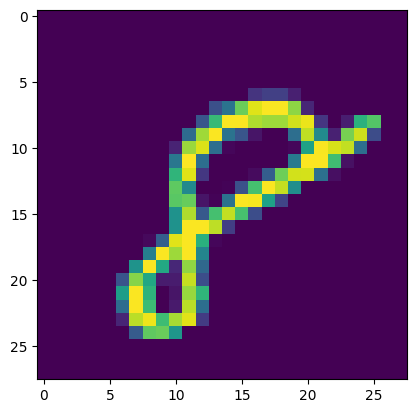

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[59999])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) 

In [11]:
graphpl = model.fit(X_train, y_train, epochs = 5 , validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.9179 - val_loss: 0.1582 - val_accuracy: 0.9544
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1282 - accuracy: 0.9628 - val_loss: 0.1112 - val_accuracy: 0.9663
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.1099 - val_accuracy: 0.9674
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0854 - val_accuracy: 0.9743
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0855 - val_accuracy: 0.9758


In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [13]:
y_pred = y_prob.argmax(axis = 1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9763

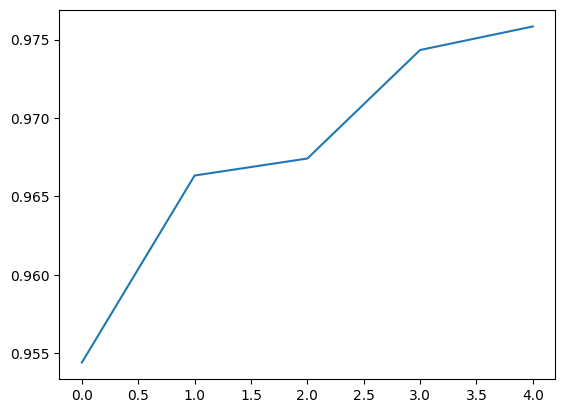

In [15]:
plt.plot(graphpl.history['val_accuracy'])

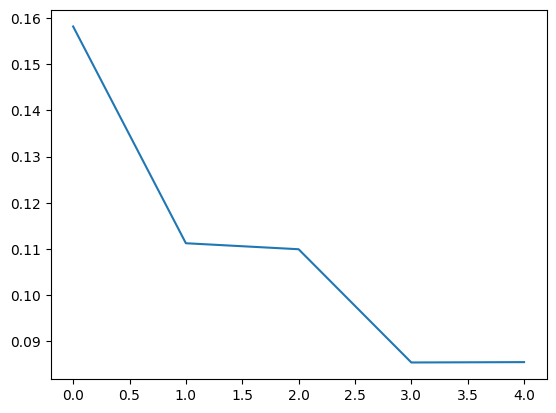

In [16]:
plt.plot(graphpl.history['val_loss'])

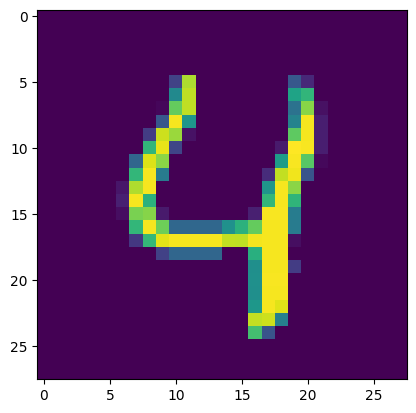

In [19]:
plt.imshow(X_test[4])

In [18]:
model.predict(X_test[8].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step


array([6], dtype=int64)